### TIKTOK APP REVIEWS DATASET - EXPLORATION AND CLEANING

In [1]:
# !pip install tokeniser
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

# Load the dataset
df2 = pd.read_csv("tiktok_app_reviews.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(df2.info())


C:\Users\beena\AppData\Local\Temp\ipykernel_17076\1096464655.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("tiktok_app_reviews.csv")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646476 entries, 0 to 3646475
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   review_text  object
 2   upvotes      int64 
 3   app_version  object
 4   posted_date  object
dtypes: int64(1), object(4)
memory usage: 139.1+ MB
None


In [3]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df2.describe())



Summary Statistics:
            upvotes
count  3.646476e+06
mean   6.874999e-01
std    3.800550e+01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    2.884200e+04


In [4]:
# Display null value counts before removal
print("Null Values Before Removal:")
print(df2.isnull().sum())

# Remove null values from "review_text" and "app_version" columns
df2.dropna(subset=['review_text', 'app_version'], inplace=True)

# Display null value counts after removal
print("\nNull Values After Removal:")
print(df2.isnull().sum())

Null Values Before Removal:
review_id           0
review_text       163
upvotes             0
app_version    993269
posted_date         0
dtype: int64

Null Values After Removal:
review_id      0
review_text    0
upvotes        0
app_version    0
posted_date    0
dtype: int64


In [5]:
# Check for duplicates
duplicates = df2[df2.duplicated()]

# Display duplicates
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
Empty DataFrame
Columns: [review_id, review_text, upvotes, app_version, posted_date]
Index: []


In [6]:
# Drop the 'review_id' column
df2_final = df2.drop(columns=['review_id'])

# Verify the changes
(df2_final.head(10))


,review_text,upvotes,app_version,posted_date
0,It is an excellent solution to finding videos ...,402,21.2.5,2021-09-20 07:50:23
1,Great app works really well so many features s...,67,21.2.5,2021-09-19 23:10:47
2,I down loaded app but didnt work . i love this...,24,21.2.5,2021-09-19 08:59:34
3,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,2021-09-19 16:34:43
4,Currently it's working good for me except a fe...,232,21.1.41,2021-09-14 06:35:02
5,"I love everything about the app, but when tryi...",55,21.3.2,2021-09-19 15:54:04
6,"Love the app, the downside is the promotion fi...",80,21.1.41,2021-09-17 19:33:03
7,A very educational and fun app. I've met alot ...,17,21.2.5,2021-09-20 02:10:47
8,"Love, love, love this app!!! Cannot wait to ma...",12,21.3.2,2021-09-19 18:28:00
9,My wifi is great and all my other apps work gr...,9,21.2.5,2021-09-20 00:17:38


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

# Initialize stemming and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a function for text preprocessing

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and numbers
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in tokens]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the review_text column
filtered_df_test = df2_final.copy()
filtered_df_test['cleaned_text'] = filtered_df_test['review_text'].apply(preprocess_text)

In [9]:
# Export DataFrame to CSV
filtered_df_test.to_csv('filtered_reviews.csv')


In [10]:
df2_final['cleaned_text'] = filtered_df_test['cleaned_text']

In [11]:
# Get unique app versions
unique_versions = df2_final['app_version'].unique()

# Print unique versions
print("Unique App Versions:")
print(unique_versions)

Unique App Versions:
['21.2.5' '21.1.41' '21.3.2' '20.9.3' '21.1.6' '21.2.4' '21.2.2' '21.1.5'
 '21.2.1' '21.2.3' '20.6.4' '21.1.3' '20.0.5' '20.2.5' '21.1.2' '20.7.5'
 '20.8.4' '20.4.6' '20.4.4' '20.9.2' '20.3.41' '21.3.1' '20.3.3' '20.5.3'
 '20.4.3' '20.4.5' '21.1.4' '20.2.4' '20.3.1' '20.1.2' '20.2.2' '20.7.4'
 '20.8.2' '20.2.3' '20.3.2' '20.6.2' '20.6.3' '20.8.1' '20.3.16' '20.1.1'
 '20.5.1' '20.4.1' '20.7.3' '20.8.3' '20.9.1' '20.5.2' '20.7.2' '20.2.1'
 '20.6.1' '19.5.43' '19.2.4' '19.8.3' '19.9.4' '19.1.3' '19.7.4' '18.8.41'
 '19.3.4' '20.0.4' '20.4.2' '20.0.2' '18.9.5' '19.9.3' '19.5.42' '18.9.4'
 '19.2.41' '19.5.4' '19.6.2' '20.0.3' '20.0.1' '19.7.3' '19.2.3' '19.9.2'
 '19.3.3' '18.9.3' '19.3.1' '19.8.2' '19.2.2' '19.5.2' '19.7.2' '19.0.2'
 '19.6.1' '19.5.1' '19.7.1' '19.1.2' '19.5.41' '19.5.55' '19.5.3' '18.9.1'
 '19.6.4' '18.9.2' '20.0.21' '19.2.1' '18.6.6' '16.6.43' '17.5.5'
 '16.6.52' '14.9.4' '16.6.4' '18.3.6' '15.7.42' '18.7.41' '18.7.5'
 '18.2.41' '17.7.5' '15.9.6' '20.8

In [12]:
import re

# Define a function to normalize version numbers
def normalize_version(version):
    # Extract numeric components using regular expressions
    version_numbers = re.findall(r'\d+', version)
    
    # Join the numeric components with dots
    normalized_version = '.'.join(version_numbers)
    
    return normalized_version

# Normalize app versions
df2_final['normalized_version'] = df2_final['app_version'].apply(normalize_version)

# Get unique normalized versions
unique_normalized_versions = df2_final['normalized_version'].unique()

# Print unique normalized versions
print("Unique Normalized App Versions:")
print(unique_normalized_versions)


Unique Normalized App Versions:
['21.2.5' '21.1.41' '21.3.2' '20.9.3' '21.1.6' '21.2.4' '21.2.2' '21.1.5'
 '21.2.1' '21.2.3' '20.6.4' '21.1.3' '20.0.5' '20.2.5' '21.1.2' '20.7.5'
 '20.8.4' '20.4.6' '20.4.4' '20.9.2' '20.3.41' '21.3.1' '20.3.3' '20.5.3'
 '20.4.3' '20.4.5' '21.1.4' '20.2.4' '20.3.1' '20.1.2' '20.2.2' '20.7.4'
 '20.8.2' '20.2.3' '20.3.2' '20.6.2' '20.6.3' '20.8.1' '20.3.16' '20.1.1'
 '20.5.1' '20.4.1' '20.7.3' '20.8.3' '20.9.1' '20.5.2' '20.7.2' '20.2.1'
 '20.6.1' '19.5.43' '19.2.4' '19.8.3' '19.9.4' '19.1.3' '19.7.4' '18.8.41'
 '19.3.4' '20.0.4' '20.4.2' '20.0.2' '18.9.5' '19.9.3' '19.5.42' '18.9.4'
 '19.2.41' '19.5.4' '19.6.2' '20.0.3' '20.0.1' '19.7.3' '19.2.3' '19.9.2'
 '19.3.3' '18.9.3' '19.3.1' '19.8.2' '19.2.2' '19.5.2' '19.7.2' '19.0.2'
 '19.6.1' '19.5.1' '19.7.1' '19.1.2' '19.5.41' '19.5.55' '19.5.3' '18.9.1'
 '19.6.4' '18.9.2' '20.0.21' '19.2.1' '18.6.6' '16.6.43' '17.5.5'
 '16.6.52' '14.9.4' '16.6.4' '18.3.6' '15.7.42' '18.7.41' '18.7.5'
 '18.2.41' '17.7.5' '15

In [20]:
# Add ".0" to versions that lack it
df2_final['normalized_version'] = df2_final['normalized_version'].apply(lambda x: x if len(x.split('.')) == 3 else x + '.0')

# Split the version column into major, minor, and patch columns
df2_final[['Major', 'Minor', 'Patch']] = df2_final['normalized_version'].str.split('.', expand=True).astype(int)

df2_final.to_csv('df2_final.csv', index=False)

# Display the DataFrame with the new columns
df2_final

,review_text,upvotes,app_version,cleaned_text,normalized_version,Major,Minor,Patch
posted_date,,,,,,,,
2021-09-20 07:50:23,It is an excellent solution to finding videos ...,402,21.2.5,excellent solution find videos follow people s...,21.2.5,21,2,5
2021-09-19 23:10:47,Great app works really well so many features s...,67,21.2.5,great app work really well many feature many n...,21.2.5,21,2,5
2021-09-19 08:59:34,I down loaded app but didnt work . i love this...,24,21.2.5,load app didnt work love app could maybe fix b...,21.2.5,21,2,5
2021-09-19 16:34:43,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,great app fun use however arbitrary algorithms...,21.2.5,21,2,5
2021-09-14 06:35:02,Currently it's working good for me except a fe...,232,21.1.41,currently work good except clip video work 4 h...,21.1.41,21,1,41
...,...,...,...,...,...,...,...,...
2015-07-13 23:52:36,Music,2,v0.8.2,music,0.8.2,0,8,2
2015-07-13 23:12:18,Love it,9,v0.8.2,love,0.8.2,0,8,2
2015-07-13 12:41:13,Its amazing,0,v0.8.2,amaze,0.8.2,0,8,2


In [142]:
# Sort the DataFrame by 'upvotes' column in descending order
df_all_sorted = df2_final.sort_values(by='upvotes', ascending=False)

# Perform sentiment analysis using TextBlob
from textblob import TextBlob

# Define a function to perform sentiment analysis using TextBlob
def perform_sentiment_analysis(text):
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    
    # Categorize sentiment score into labels
    if sentiment_score < 0:
        sentiment = 'NEG'
    elif sentiment_score == 0:
        sentiment = 'NEU'
    else:
        sentiment = 'POS'
        
    return sentiment_score, sentiment

# Apply sentiment analysis function to the 'cleaned_text' column
df_all_sorted[['sentiment_score', 'sentiment']] = df_all_sorted['cleaned_text'].apply(lambda x: pd.Series(perform_sentiment_analysis(x)))


# Display the sentiment analysis results
print("Sentiment Analysis Results:")
print(df_all_sorted[['review_text', 'upvotes', 'sentiment_score', 'sentiment']])

Sentiment Analysis Results:
                                                           review_text   
posted_date                                                              
2019-04-12 21:45:57  This app is good. We can connect to the world ...  \
2019-06-11 02:29:06  this app is good but it dosent give me the new...   
2019-02-02 17:51:12  I love this Application but please add differe...   
2019-03-21 16:56:02  This app is perfect for people. I'm 13 and my ...   
2020-12-07 11:58:34  I really enjoy the app, very much, but there a...   
...                                                                ...   
2020-01-13 07:22:52                            I'm not tik tok famous😭   
2020-11-22 12:20:23                                   You are the best   
2018-12-07 10:01:22                                         It is cool   
2020-11-06 05:45:22                                        It's really   
2017-03-06 09:43:55                                              Beast   

         

In [144]:
# Count the occurrences of each sentiment category
sentiment_counts = df_all_sorted['sentiment'].value_counts()

# Display the counts
print("Sentiment Counts:")
print(sentiment_counts)


Sentiment Counts:
sentiment
POS    1790118
NEU     824890
NEG      38060
Name: count, dtype: int64


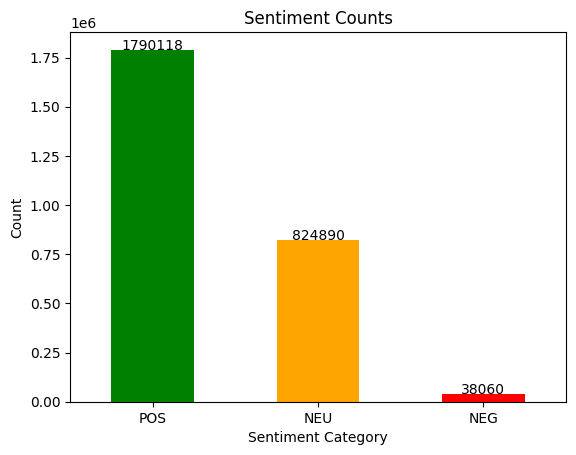

In [145]:
# Plot the count of each sentiment category
ax = sentiment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add count labels on top of the bars
for i, count in enumerate(sentiment_counts):
    ax.text(i, count + 1000, str(count), ha='center')

plt.show()

# Find trigrams from negative comments
negative_comments_trigrams = []

for text in negative_comments['cleaned_text']:
    words = text.split()
    trigrams = [(words[i], words[i+1], words[i+2]) for i in range(len(words)-2)]
    negative_comments_trigrams.extend(trigrams)



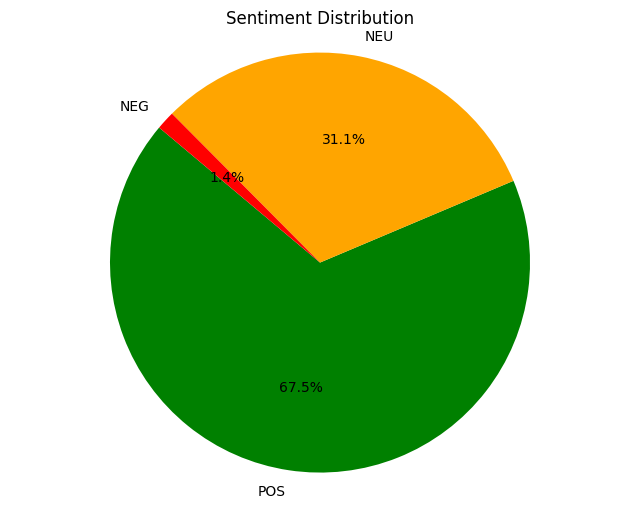

In [146]:
import matplotlib.pyplot as plt

# Calculate percentages for each sentiment category
percentages = sentiment_counts / total_sentiments * 100

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [148]:
# Find trigrams from all negative comments
all_negative_comments_trigrams = []

for text in negative_comments['cleaned_text']:
    words = text.split()
    trigrams = [(words[i], words[i+1], words[i+2]) for i in range(len(words)-2)]
    all_negative_comments_trigrams.extend(trigrams)

# Count the occurrences of each trigram
all_trigram_counts = Counter(all_negative_comments_trigrams)

# Display the top 10 most common trigrams from all negative comments
top_10_negative_trigrams_all = all_trigram_counts.most_common(10)
print("Trigrams from All Negative Comments:")
for trigram, count in top_10_negative_trigrams_all:
    print(trigram, count)


Trigrams from All Negative Comments:
('tik', 'tok', 'team') 48
('mere', 'tik', 'tok') 41
('make', 'active', 'give') 37
('give', 'view', 'profile') 37
('profile', 'make', 'active') 37
('make', 'active', 'mode') 37
('active', 'give', 'view') 36
('hi', 'tik', 'tok') 35
('view', 'profile', 'since') 35
('active', 'mode', 'would') 35


In [160]:
# Filter the DataFrame to select only negative comments with 'NEG' sentiment
negative_comments = df_all_sorted[df_all_sorted['sentiment'] == 'NEG']

# Sort the negative comments DataFrame by 'upvotes' column in descending order
negative_comments_sorted = negative_comments.sort_values(by='upvotes', ascending=False)

# Fetch the top 10 most upvoted negative comments
top_10_negative_upvoted = negative_comments_sorted.head(10)

# Print the review text and upvotes for each comment
print("Review Text of Top 10 Negative Comments with Highest Upvotes:")
for index, row in top_10_negative_upvoted.iterrows():
    print("Review Text:", row['review_text'])
    print("Upvotes:", row['upvotes'])
    print("Sentiment:", row['sentiment'])
    print()


Review Text of Top 10 Negative Comments with Highest Upvotes:
Review Text: Horrible . Horrilby good
Upvotes: 4507
Sentiment: NEG

Review Text: At first I thought it was stupid just like every one else. But I though, hey can't judge it if you don't try it. But what I learned is tik tok hasa AMAZING recommending system. You jump in once and your already finding things you find are funny and agree with. Not only that, it recommends small channels just as much as the big ones! If you think this is stupid. Just try it, if you don't like well at least you tried it, and if you like it, well prepare for hours upon hours upon hours of content!
Upvotes: 4260
Sentiment: NEG

Review Text: This app is amazing!! This is very interesting and you can spend hours on it without getting bored, but there are many problems, minor problems and big problems. For example there will be a big problem that tiktok is deleting random videos that really bothers me, some of my favorite videos have been deleted for n

In [162]:
# Export the DataFrame to a CSV file without the index
filtered_df_test.to_csv('filtered_data.csv', index=False)
df_all_sorted.to_csv('sentiment_analysis_results.csv', index=False)

### TIME SERIES ANALYSIS

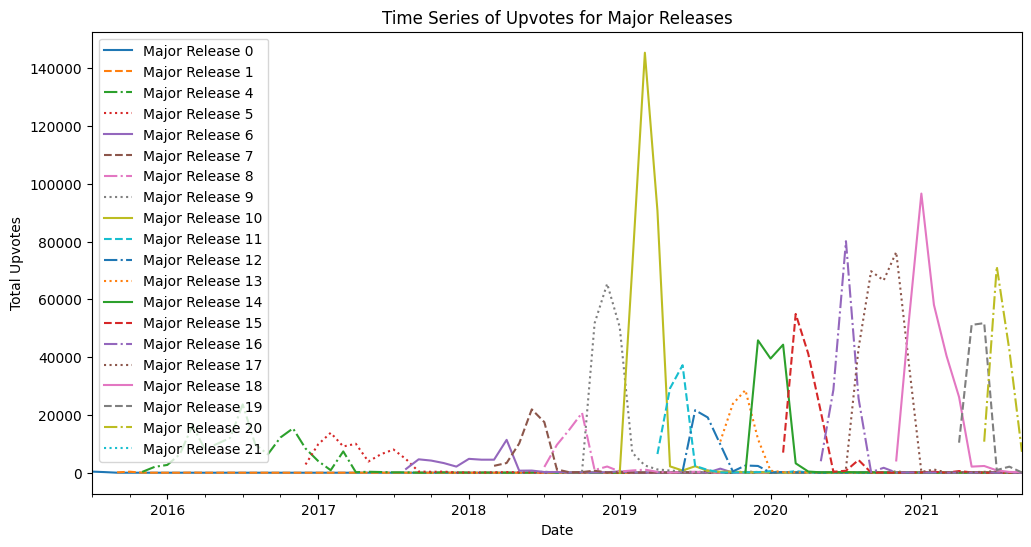

In [27]:
# Define line styles for each major release
line_styles = ['-', '--', '-.', ':']

# Plot time series for major releases with different line styles
plt.figure(figsize=(12, 6))
for i, (major_version, group) in enumerate(df2_final.groupby('Major')):
    group.groupby(pd.Grouper(freq='M'))['upvotes'].sum().plot(label=f'Major Release {major_version}', linestyle=line_styles[i % len(line_styles)])

plt.title('Time Series of Upvotes for Major Releases')
plt.xlabel('Date')
plt.ylabel('Total Upvotes')
plt.legend()
plt.show()


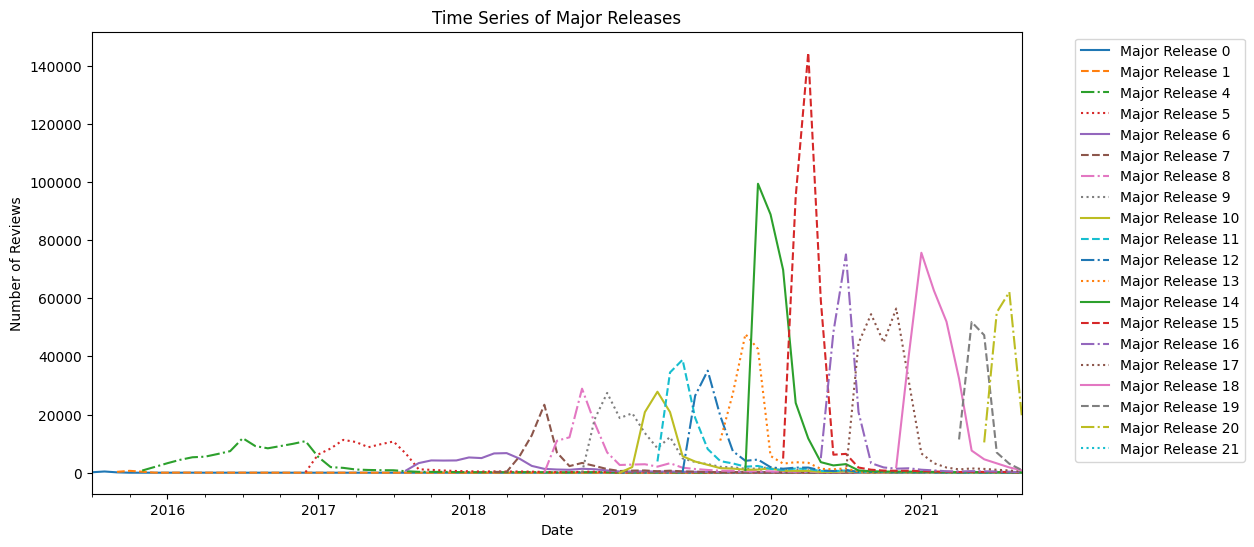

In [28]:
# Plot time series for major releases with different line styles
plt.figure(figsize=(12, 6))
for i, (major_version, group) in enumerate(df2_final.groupby('Major')):
    group.groupby(pd.Grouper(freq='M')).size().plot(label=f'Major Release {major_version}', linestyle=line_styles[i % len(line_styles)])

plt.title('Time Series of Major Releases')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# Move the legend outside the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### MAJOR VERSION 10

In [29]:
# Filter rows where major release is 10
df_major_release_10 = df2_final[df2_final['Major'] == 10]

# Display the new DataFrame
df_major_release_10


,review_text,upvotes,app_version,cleaned_text,normalized_version,Major,Minor,Patch
posted_date,,,,,,,,
2019-06-25 07:27:21,Tik Tok is a very fun way to express who you a...,0,10.5.0,tik tok fun way express music dont need put mu...,10.5.0,10,5,0
2019-03-25 05:18:48,I do like looking through this app once in awh...,45,10.5.0,like look app awhile little annoy customize st...,10.5.0,10,5,0
2019-04-12 21:45:57,This app is good. We can connect to the world ...,28842,10.8.0,app good connect world app also spend time bor...,10.8.0,10,8,0
2020-01-11 15:27:02,it's so good and I'm a lil kid I love it .I've...,0,10.5.0,good lil kid love play two weeks love 0 ads re...,10.5.0,10,5,0
2019-04-21 23:11:08,I really love this app you can do many things ...,94,10.7.1,really love app many things upset reason priva...,10.7.1,10,7,1
...,...,...,...,...,...,...,...,...
2019-06-17 21:00:38,nyc,0,10.0.1,nyc,10.0.1,10,0,1
2019-01-24 21:24:13,Nice,0,10.0.1,nice,10.0.1,10,0,1
2019-05-09 16:24:12,good,0,10.0.1,good,10.0.1,10,0,1


In [31]:
df_major_release_10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94425 entries, 2019-06-25 07:27:21 to 2019-03-20 12:20:04
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_text         94425 non-null  object
 1   upvotes             94425 non-null  int64 
 2   app_version         94425 non-null  object
 3   cleaned_text        94425 non-null  object
 4   normalized_version  94425 non-null  object
 5   Major               94425 non-null  int32 
 6   Minor               94425 non-null  int32 
 7   Patch               94425 non-null  int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 5.4+ MB


In [165]:
# Define a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


# Use .loc to assign values to the DataFrame
df_major_release_10.loc[:, 'sentiment'] = df_major_release_10['cleaned_text'].apply(get_sentiment)


In [166]:
def categorize_sentiment(sentiment_score):
    if sentiment_score < 0:
        return 'NEG'
    elif sentiment_score == 0:
        return 'NEU'
    else:
        return 'POS'

# Create a new column 'sentiment_category' in the original DataFrame using .loc
df_major_release_10.loc[:, 'sentiment_category'] = df_major_release_10['sentiment'].apply(categorize_sentiment)

# Display the DataFrame with sentiment categories
df_major_release_10[['cleaned_text', 'sentiment', 'sentiment_category']]


,cleaned_text,sentiment,sentiment_category
posted_date,,,
2019-06-25 07:27:21,tik tok fun way express music dont need put mu...,0.490000,POS
2019-03-25 05:18:48,like look app awhile little annoy customize st...,-0.080745,NEG
2019-04-12 21:45:57,app good connect world app also spend time bor...,0.300000,POS
2020-01-11 15:27:02,good lil kid love play two weeks love 0 ads re...,0.360000,POS
2019-04-21 23:11:08,really love app many things upset reason priva...,0.305556,POS
...,...,...,...
2019-06-17 21:00:38,nyc,0.000000,NEU
2019-01-24 21:24:13,nice,0.600000,POS
2019-05-09 16:24:12,good,0.700000,POS


In [167]:
sentiment_counts = df_major_release_10['sentiment_category'].value_counts()
print(sentiment_counts)

pos_count = sentiment_counts['POS']
neg_count = sentiment_counts['NEG']
neu_count = sentiment_counts['NEU']



sentiment_category
POS    62488
NEU    30903
NEG     1034
Name: count, dtype: int64


In [163]:
df_major_release_10.head(10)

,review_text,upvotes,app_version,cleaned_text,normalized_version,Major,Minor,Patch,sentiment,sentiment_category
posted_date,,,,,,,,,,
2019-06-25 07:27:21,Tik Tok is a very fun way to express who you a...,0,10.5.0,tik tok fun way express music dont need put mu...,10.5.0,10,5,0,0.490000,POS
2019-03-25 05:18:48,I do like looking through this app once in awh...,45,10.5.0,like look app awhile little annoy customize st...,10.5.0,10,5,0,-0.080745,NEG
2019-04-12 21:45:57,This app is good. We can connect to the world ...,28842,10.8.0,app good connect world app also spend time bor...,10.8.0,10,8,0,0.300000,POS
2020-01-11 15:27:02,it's so good and I'm a lil kid I love it .I've...,0,10.5.0,good lil kid love play two weeks love 0 ads re...,10.5.0,10,5,0,0.360000,POS
2019-04-21 23:11:08,I really love this app you can do many things ...,94,10.7.1,really love app many things upset reason priva...,10.7.1,10,7,1,0.305556,POS
2019-04-25 02:07:35,It's really good . I think you should get it ....,359,10.8.0,really good think get go live everything peopl...,10.8.0,10,8,0,0.234207,POS
2021-07-26 02:13:38,I love it everyone one this app gets me.Everyt...,0,10.7.0,love everyone one app get think cosplay comdey...,10.7.0,10,7,0,0.500000,POS
2019-03-01 00:49:49,Can you add a volume control bar maybe to the ...,4751,10.1.1,add volume control bar maybe top right screen ...,10.1.1,10,1,1,0.430952,POS
2019-06-03 02:34:06,This is a very nice app. I like this app but i...,0,10.4.0,nice app like app use much data problem app go...,10.4.0,10,4,0,0.293636,POS


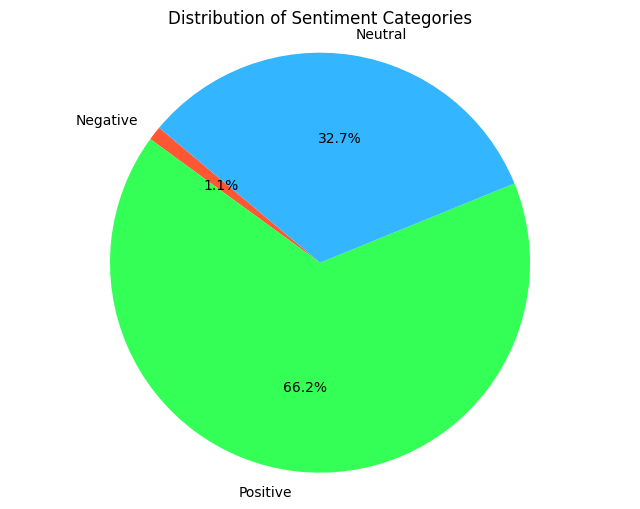

In [164]:
# Calculate total counts of each sentiment category
negative_count = (df_major_release_10['sentiment_category'] == 'NEG').sum()
positive_count = (df_major_release_10['sentiment_category'] == 'POS').sum()
neutral_count = (df_major_release_10['sentiment_category'] == 'NEU').sum()

# Data for the pie chart
counts = [negative_count, positive_count, neutral_count]
labels = ['Negative', 'Positive', 'Neutral']
colors = ['#FF5733', '#33FF57', '#33B5FF']  # Red, Green, Blue

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


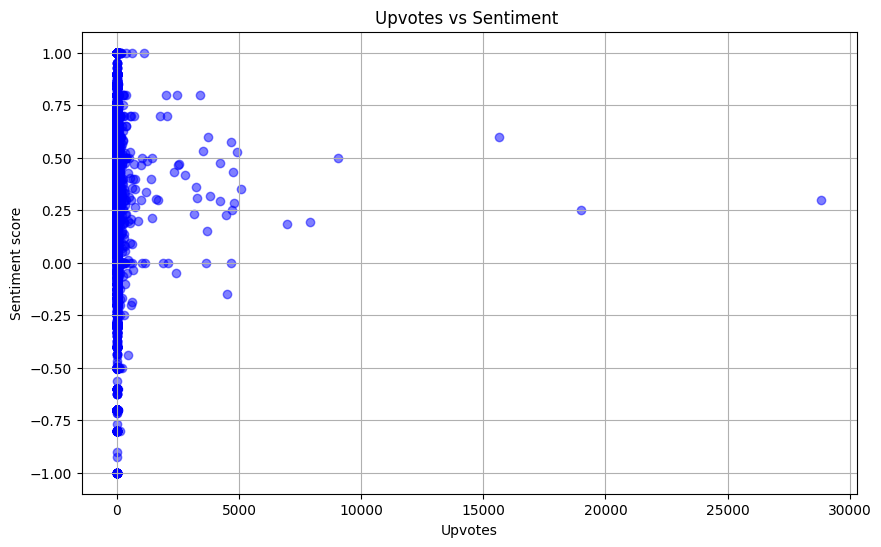

In [91]:
import matplotlib.pyplot as plt

# Scatter plot of upvotes vs sentiment percentage
plt.figure(figsize=(10, 6))
plt.scatter(df_major_release_10['upvotes'], df_major_release_10['sentiment'], color='blue', alpha=0.5)
plt.title('Upvotes vs Sentiment ')
plt.xlabel('Upvotes')
plt.ylabel('Sentiment score')
plt.grid(True)
plt.show()


In [67]:
from nltk.util import ngrams
from collections import Counter

# Sample negative comments
negative_comments = df_major_release_10[df_major_release_10['sentiment_category'] == 'NEG']['cleaned_text']

# Function to generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens.split(), n))

# Generate n-grams
n = 2  # Example for bi-grams, you can change it to any other value for different n-grams
n_grams = negative_comments.apply(lambda x: generate_ngrams(x, n))

# Flatten the list of n-grams
flat_n_grams = [item for sublist in n_grams for item in sublist]

# Counting the frequency of n-grams
n_gram_freq = Counter(flat_n_grams)
print(n_gram_freq.most_common(10))  # Display the top 10 most common n-grams


[(('tik', 'tok'), 75), (('please', 'please'), 41), (('bad', 'app'), 25), (('bhot', 'hard'), 20), (('sorry', 'sorry'), 15), (('love', 'app'), 14), (('go', 'live'), 14), (('like', 'app'), 13), (('slow', 'motion'), 13), (('waste', 'time'), 12)]


In [68]:
from nltk.util import ngrams
from collections import Counter

# Sample negative comments
negative_comments = df_major_release_10[df_major_release_10['sentiment_category'] == 'NEG']['cleaned_text']

# Function to generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens.split(), n))

# Generate n-grams
n = 3  # Example for bi-grams, you can change it to any other value for different n-grams
n_grams = negative_comments.apply(lambda x: generate_ngrams(x, n))

# Flatten the list of n-grams
flat_n_grams = [item for sublist in n_grams for item in sublist]

# Counting the frequency of n-grams
n_gram_freq = Counter(flat_n_grams)
print(n_gram_freq.most_common(10))  # Display the top 10 most common n-grams

[(('please', 'please', 'please'), 38), (('sorry', 'sorry', 'sorry'), 14), (('worst', 'worst', 'worst'), 10), (('picture', 'picture', 'picture'), 6), (('hate', 'tik', 'tok'), 5), (('fan', 'go', 'live'), 5), (('love', 'tik', 'tok'), 4), (('app', 'waste', 'time'), 4), (('way', 'way', 'way'), 4), (('time', 'pass', 'message'), 4)]


In [72]:
# Sort the DataFrame by 'upvotes' column in descending order
df_sorted = df_major_release_10.sort_values(by='upvotes', ascending=False)

# Fetch the top three high upvote reviews
top_three_high_upvote_reviews = df_sorted.head(6)

# Print the whole text of the top three high upvote reviews
for index, row in top_three_high_upvote_reviews.iterrows():
    print("Review Text:")
    print(row['review_text'])
    print("Upvotes:", row['upvotes'])
    print("\n")

Review Text:
This app is good. We can connect to the world by this app. We can also spend our time if we are bored. But we should not be addict to it. I have seen people wasting their money for clothes and make-up for making videos. I have also seen people making videos of others in public places and cars. That must be avoided. This app increases our skill of acting too. I love this app. I want to just suggest that if tje touch magic will be there, it will be more interesting. THANK YOU !!!! ❤❤❤
Upvotes: 28842


Review Text:
I love this Application but please add different methods to withdrawal money please like jazzcash easypaisa please thankyou
Upvotes: 18981


Review Text:
This app is perfect for people. I'm 13 and my mom won't even let me have Snapchat, Instagram, Twitter or nothing. I asked my mom about this app and she did research. She said this app is perfect and I can have it. My mom is very protective of me and she makes sure my account is private. My mom loves this app and s

In [76]:
# Filter the DataFrame to select only negative comments
negative_comments = df_major_release_10[df_major_release_10['sentiment_category'] == 'NEG']

# Sort the negative comments DataFrame by 'upvotes' column in descending order
negative_comments_sorted = negative_comments.sort_values(by='upvotes', ascending=False)

# Fetch the top 5 most upvoted negative comments
top_5_negative_comments = negative_comments_sorted.head(5)

# Print the whole text of the top 5 most upvoted negative comments
for index, row in top_5_negative_comments.iterrows():
    print("Review Text:")
    print(row['review_text'])
    print("Upvotes:", row['upvotes'])
    print("\n")


Review Text:
Horrible . Horrilby good
Upvotes: 4507


Review Text:
@rakeshyaadhav i'm too much angry with this app view is not comming well im too much sad now with this app let check my account @rakeshyaadhav. plz do something and plz promote my video my all video is good and clear but then also not giving view not comming like also 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😢😢😢😢😢😢😢😢😢😢😢😢😢😢❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️
Upvotes: 2436


Review Text:
This app isn't really for kids, I would suggest 16+ on this app, maybe even 17+. Besides from that the app is great, definitely can get addictive. If you can handle hate comments and just have fun on the app then your golden 👌✨ I won't rate the app based on the community. Bugs have been fixed THANK YOU! I can now rate 5 stars ☺️
Upvotes: 2096


Review Text:
I love tik tok, but I really hate when it says I'm tapping too fast. I waited about almost 2 hours and I still cant like my bffs video. Can you fix this tik tok?! But other than that amazing!
Upvotes: 

### MAJOR VERSION 15

In [78]:
# Filter rows where major release is 15
df_major_release_15 = df2_final[df2_final['Major'] == 15]

# Display the new DataFrame
df_major_release_15


,review_text,upvotes,app_version,cleaned_text,normalized_version,Major,Minor,Patch
posted_date,,,,,,,,
2021-07-21 19:27:40,It's an amazing app! You can do so many things...,0,15.7.42,amaze app many things watch videos text friend...,15.7.42,15,7,42
2021-09-08 05:12:35,"I love this app, i worked so hard on getting 1...",0,15.9.6,love app work hard get 1k goive live option go...,15.9.6,15,9,6
2021-08-27 21:38:58,I love this app so much i can message my frien...,0,15.9.2,love app much message friends promblems get 20...,15.9.2,15,9,2
2021-07-25 23:17:48,This app is amazing but it takes up a lot of s...,0,15.7.45,app amaze take lot storage phone apart fun go ...,15.7.45,15,7,45
2021-09-08 12:46:07,I love love this app.... Basically one of the ...,0,15.9.4,love love app basically one best app entertain...,15.9.4,15,9,4
...,...,...,...,...,...,...,...,...
2020-03-18 16:53:49,Nice,0,15.0.0,nice,15.0.0,15,0,0
2020-02-23 09:21:55,Good,0,15.0.0,good,15.0.0,15,0,0
2020-02-23 13:28:00,Good,0,15.0.0,good,15.0.0,15,0,0


In [170]:
# Apply sentiment analysis to the 'cleaned_text' column
df_major_release_15.loc[:,'sentiment'] = df_major_release_15['cleaned_text'].apply(get_sentiment)

In [171]:
# Function to categorize sentiment scores to labels
def categorize_sentiment(sentiment_score):
    if sentiment_score < 0:
        return 'NEG'
    elif sentiment_score == 0:
        return 'NEU'
    else:
        return 'POS'

# Apply sentiment categorization function to the 'sentiment' column
df_major_release_15.loc[:,'sentiment_category'] = df_major_release_15['sentiment'].apply(categorize_sentiment)

# Count the occurrences of each sentiment category
sentiment_counts = df_major_release_15['sentiment_category'].value_counts()

# Display the counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
sentiment_category
POS    221702
NEU     97450
NEG      4533
Name: count, dtype: int64


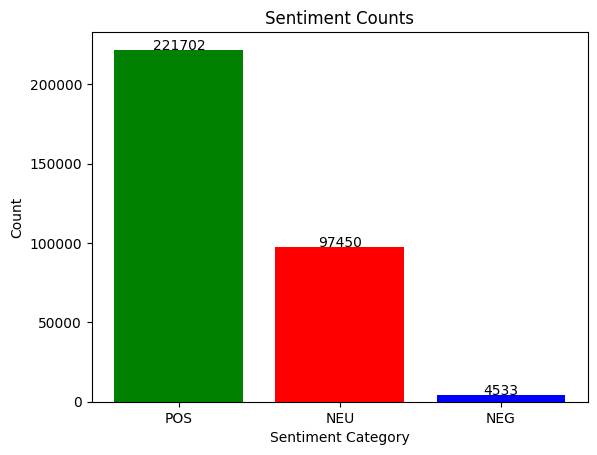

In [175]:
import matplotlib.pyplot as plt

# Define the sentiment categories and their counts
sentiment_categories = sentiment_counts.index
counts = sentiment_counts.values

# Plot the count of each sentiment category
plt.bar(sentiment_categories, counts, color=['green', 'red', 'blue'])

# Add labels and title
plt.title('Sentiment Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Add count labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center')

# Show the plot
plt.show()


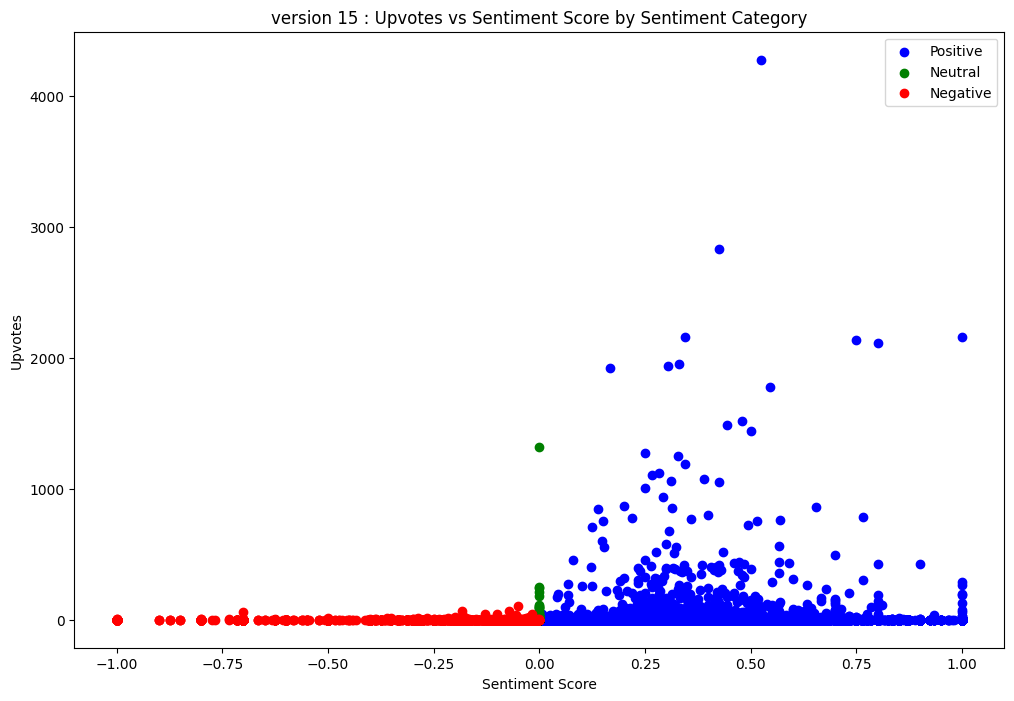

In [176]:
import matplotlib.pyplot as plt

# Separate data by sentiment category
positive_sentiment = df_major_release_15[df_major_release_15['sentiment_category'] == 'POS']
neutral_sentiment = df_major_release_15[df_major_release_15['sentiment_category'] == 'NEU']
negative_sentiment = df_major_release_15[df_major_release_15['sentiment_category'] == 'NEG']

# Create scatter plots
plt.figure(figsize=(12, 8))

plt.scatter(positive_sentiment['sentiment'], positive_sentiment['upvotes'], color='blue', label='Positive')
plt.scatter(neutral_sentiment['sentiment'], neutral_sentiment['upvotes'], color='green', label='Neutral')
plt.scatter(negative_sentiment['sentiment'], negative_sentiment['upvotes'], color='red', label='Negative')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Upvotes')
plt.title('version 15 : Upvotes vs Sentiment Score by Sentiment Category')
plt.legend()

# Show plot
plt.show()


In [177]:
# Sort the DataFrame by 'upvotes' column in descending order
df_sorted = df_major_release_15.sort_values(by='upvotes', ascending=False)

# Fetch the top three high upvote reviews
top_three_high_upvote_reviews = df_sorted.head(6)

# Print the whole text of the top three high upvote reviews
for index, row in top_three_high_upvote_reviews.iterrows():
    print("Review Text:")
    print(row['review_text'])
    print("Upvotes:", row['upvotes'])
    print("\n")



Review Text:
You can watch/ record videos and have fun with this app it's awesome! But you will be addicted! It's great you SHOULD DEFINITELY Download it 👍😊
Upvotes: 4274


Review Text:
This is my favorite app 😂 it's so addicting 😆 I love making fun vids wit my friends and enjoying other people's content
Upvotes: 2827


Review Text:
Tik Tok is the best I guarantee you that
Upvotes: 2161


Review Text:
Good app to post videos on, definitely a lot of fun and you can meet a lot of new cool people from around the world. Very easy to go viral on TikTok, started in 2019 and managed to get a couple good videos in the millions, have been posting videos ever since and growing my page! Having a great time and enjoying the daily grind of making and posting videos for my followers to see 👍 Definitely an app worth giving a try if your into making videos!
Upvotes: 2159


Review Text:
It is an awesome app. Once you get set up you can watch tons of people's videos and you can press the follow button i

In [178]:
# Filter the DataFrame to select only negative comments
negative_comments = df_major_release_15[df_major_release_15['sentiment_category'] == 'NEG']

# Sort the negative comments DataFrame by 'upvotes' column in descending order
negative_comments_sorted = negative_comments.sort_values(by='upvotes', ascending=False)

# Fetch the top 5 most upvoted negative comments
top_5_negative_comments = negative_comments_sorted.head(5)

# Print the whole text of the top 5 most upvoted negative comments
for index, row in top_5_negative_comments.iterrows():
    print("Review Text:")
    print(row['review_text'])
    print("Upvotes:", row['upvotes'])
    print("\n")


Review Text:
Dear Ticketok App and Ticketok owner, I request you to make my video viral for two long days.
Upvotes: 104


Review Text:
Bad it got my son horny and my daughter pregnant.
Upvotes: 66


Review Text:
I love this app...but Mere tiktok k app me bohat sare new effects nhi aa rahe hai. Update karne k bad bhi. My journey and double express Jese new effects kyu nahi aa rahe hai. Mene bohat bar report me msg kiya lekin koi reply nhi aya..pls problem solve karo meri
Upvotes: 65


Review Text:
bad application
Upvotes: 57


Review Text:
Addicting!! Fun to watch & make videos, lots of variety in content. Only con is video editing can be a little difficult & def time consuming.
Upvotes: 44


